# Solutions Exersice Session 1

## Exersice 4: Birthdays
Assume that $m$ students born on independent days in $1999$ are attending a lecture.
Show that the probability that at least two of them share the same birthday is
$$
  p = 1 -  \frac{1}{365^{m}} \frac{365!}{(365-m)!}. 
$$
Verify that if there are at least $m=23$ students, $p$ is larger than $1/2$.

**python**: Write a script drawing $m \in \{5,23,100\}$ birthdays $n$ times to confirm the above equation. Plot the empirical (= based on you simulated data) and theoretical probability against the number of draws $n$ for $1 \leq n \leq 1000$. How many draws do you need for the empirical probability to be representative of the theoretical probability for the different values of $m$? Why do you think this is?

### Solution:

The probaility that a specific student has a specific birthday is going to be $\frac{1}{365}$. A specific outcome involving $m$ stduents thus has probability $\frac{1}{365^m}$.

Let $U$ be the event describing that all students have unique birthdays. How many outcomes correspond to $U$? Assume we line up the students and ask them one after another what their birthday is. For the first student there are $365$ different answers such that the event $U$ is still true. For the second $364$, for the third $363$ and for the $m$:th $365-m+1$. The number of outcomes is thus

$$
    365*364*\cdots * (365-m+1) = \frac{365!}{(365-m)!} = \text{P}_{m}^{365},
$$

where $\text{P}_{m}^{365}$ denotes the number of permutations of $m$ elements in a set of $365$. Since all events in this exersice are independent the probaility of $U$ is thus 

$$
    \Pr[U] = \frac{1}{365^m} \frac{365!}{(365-m)!}.
$$

We are interested in the probaility of the "opposite" event, that at least two students have the same birthday. Thus:

$$
    p = \Pr[\bar{U}] = 1 - \Pr[U] = 1 - \frac{1}{365^m} \frac{365!}{(365-m)!}.
$$

To calculate this probability we could use Wolfram or maybe write a small script:


In [18]:
p_U = 1
m = 23
for i in range(m):
    p_U = p_U*(365.-i)/365.
p = 1-p_U
print(p)

0.5072972343239855


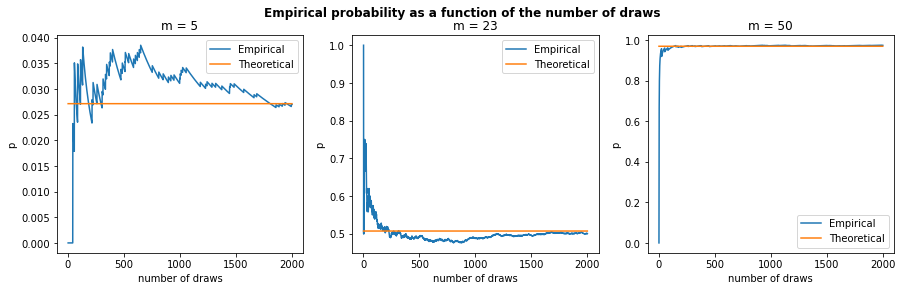

In [36]:
import numpy as np
import matplotlib.pyplot as plt

m_list = [5,23,50]
n_list = range(1,2001)

count = np.zeros(len(m_list))
p = np.zeros((len(n_list),len(m_list)))

for n in n_list:
    for i_m in range(len(m_list)):
        birthday = np.random.choice(365,size=m_list[i_m])
        unique_birthday = np.unique(birthday)
        if len(birthday) > len(unique_birthday):
            count[i_m] = count[i_m] + 1
    p[n-1,:] = count/n
    
p_th = np.zeros(3)

for i_m in range(len(m_list)):
    p_U = 1
    for i in range(m_list[i_m]):
        p_U = p_U*(365.-i)/365.
    p_th[i_m] = 1-p_U
    
fig, axs = plt.subplots(1, len(m_list))

# The error from class is present on row 33. We switched the dimensions 
for i_m in range(len(m_list)):
    axs[i_m].plot(n_list, p[:,i_m]) # in class p[i_m,:]
    axs[i_m].plot(n_list, p_th[i_m]*np.ones(2000))
    axs[i_m].set_xlabel('number of draws')
    axs[i_m].set_ylabel('p')
    axs[i_m].set_title('m = ' + str(m_list[i_m]) )
    axs[i_m].legend(['Empirical','Theoretical']);

plt.suptitle('Empirical probability as a function of the number of draws',fontweight = 'bold')
fig.set_figwidth(15)

## Exersice 8: Gambler Ruin

Consider a simplified version of the game of roulette, in which you wager $x$ Swedish kronas on either red or black.
The wheel is spun and you receive your original wager plus another $x$ kronas if the ball lands on your color.
If the ball does not land on your color, you loose the wager.
Assume for simplicity that each color occurs independently with probability $1/2$.
The following gambling strategy used to be popular.
On the first spin, bet $1$ krona. 
If you loose, bet $2$ krona on the next spin.
In general, if you have lost on the first $k-1$ spins, bet $2^{k-1}$ krona on the $k$th spin.
Argue that by following this strategy, you will eventually win $1$ krona.
Now let $X$ be the random variable denoting your maximum loss before winning.
Show that $\text{E}[X]$ is unbounded.

### Solution:

Let's first tackle the first part of showing that you eventually win 1 SEK. Let's say you win on spin $k$, then you get $2^{k-1} \cdot 2 = 2^k$ SEK. How much have you spent?
$$
    1 + 2 + 4 + \cdots + 2^{k-1} = \{ \text{Geometric sum} \} = 2^k - 1
$$
Hence the profit is 
$$
    2^k - (2^k -1) = 1
$$

Now for the second part of showing that the expectation is unbounded. Let's again say that you win at bet $k$. Your loss until then is
$$
    X = 2^{k-1} - 1.
$$
The probability of this is $\left( \frac{1}{2} \right)^k$ (probaility of winning on bet $k$). We can now calcualte the expectation:
$$
    \text{E}[X] = \sum_{k=1}^\infty \frac{2^{k-1} -1}{2^k} = \sum_{k=1}^\infty \left( \frac{1}{2} - \frac{1}{2^k} \right) = \sum_{k=1}^\infty \frac{1}{2} - 1 = \infty
$$
The expectation is thus unbounded.